<a href="https://colab.research.google.com/github/geedoubledee/data620_week6assignment/blob/main/DATA620_Week6_Assignment_GDavis_BDavidoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA620: Week 6 Assignment
#### by Glen Davis and Brett Davidoff

In [ ]:
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import pandas as pd

## Introduction

We load the Davis Southern Club Women dataset using code provided in [the algorithms section of the NetworkX library documentation](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html).

In [ ]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]
print("\nBiadjacency matrix:\n")
print(pd.DataFrame(bipartite.biadjacency_matrix(G, women, clubs).toarray()))



Biadjacency matrix:

    0   1   2   3   4   5   6   7   8   9   10  11  12  13
0    1   1   1   1   1   1   0   1   1   0   0   0   0   0
1    1   1   1   0   1   1   1   1   0   0   0   0   0   0
2    0   1   1   1   1   1   1   1   1   0   0   0   0   0
3    1   0   1   1   1   1   1   1   0   0   0   0   0   0
4    0   0   1   1   1   0   1   0   0   0   0   0   0   0
5    0   0   1   0   1   1   0   1   0   0   0   0   0   0
6    0   0   0   0   1   1   1   1   0   0   0   0   0   0
7    0   0   0   0   0   1   0   1   1   0   0   0   0   0
8    0   0   0   0   1   0   1   1   1   0   0   0   0   0
9    0   0   0   0   0   0   1   1   1   0   0   1   0   0
10   0   0   0   0   0   0   0   1   1   1   0   1   0   0
11   0   0   0   0   0   0   0   1   1   1   0   1   1   1
12   0   0   0   0   0   0   1   1   1   1   0   1   1   1
13   0   0   0   0   0   1   1   0   1   1   1   1   1   1
14   0   0   0   0   0   0   1   1   0   1   1   1   0   0
15   0   0   0   0   0   0   0   1

## Analysis

To deduce anything regarding these women and the social events they attended, we first draw a bipartite graph with the women's nodes labeled by their initials and the event nodes labeled numerically. We also color-code the two different types of nodes.

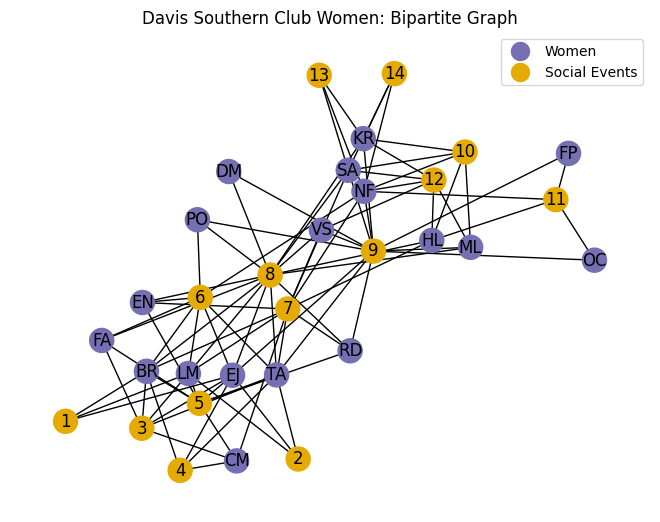

In [ ]:
init_list = ["EJ", "LM", "TA", "BR", "CM", "FA", "EN", "PO", "RD", "VS", "ML", "KR", "SA", "NF", "HL", "DM", "OC", "FP"]
init_dict = dict(zip(G.graph["top"], init_list))
event_dict = dict(zip(G.graph["bottom"], list(range(1, 15))))
color_dict = dict(zip(G.nodes, ["#7570B3"] * len(G.graph["top"]) + ["#E6AB02"] * len(G.graph["bottom"])))
nx.set_node_attributes(G, init_dict, name="init")
nx.set_node_attributes(G, event_dict, name="event")
nx.set_node_attributes(G, color_dict, name = "color")
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
def concat(d1, d2):
    return {**d1, **d2}
labs = concat(init_dict, event_dict)
colors = [n[1]["color"] for n in G.nodes(data=True)]
nx.draw(G, pos, labels=labs, node_color = colors, with_labels=True)
legend_elements = [Line2D([0], [0], marker='o', color='w', label="Women",
                          markerfacecolor="#7570B3", markersize=15),
                   Line2D([0], [0], marker='o', color='w', label="Social Events",
                          markerfacecolor="#E6AB02", markersize=15)]
plt.legend(handles=legend_elements, loc='upper right')
plt.title("Davis Southern Club Women: Bipartite Graph")
plt.show()

Next we project this bipartite graph onto the women's nodes and calculate the degree centrality for each node.

In [ ]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print("\n(Member, Number of Friends)\n")
degrees = sorted(W.degree, key=lambda x: x[1], reverse=True)
for d in degrees:
    print(d)


(Member, Number of Friends)

('Evelyn Jefferson', 17)
('Theresa Anderson', 17)
('Ruth DeSand', 17)
('Verne Sanderson', 17)
('Sylvia Avondale', 17)
('Nora Fayette', 17)
('Helen Lloyd', 17)
('Pearl Oglethorpe', 16)
('Myra Liddel', 16)
('Katherina Rogers', 16)
('Dorothy Murchison', 16)
('Laura Mandeville', 15)
('Brenda Rogers', 15)
('Frances Anderson', 15)
('Eleanor Nye', 15)
('Olivia Carleton', 12)
('Flora Price', 12)
('Charlotte McDowd', 11)


Looking solely at the unweighted number of connections between women, Evelyn Jefferson and six other women have the highest degree centrality scores possible: 17. This means they have all attended at least one social event with every other woman in this network since there are only 18 women in the network total.

Next we weight the degree scores so that each time a woman attended an event with another woman, that meeting counts as an additional connection.

In [ ]:
# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print("\n(Member, Number of Friend Meetings)\n")
degrees = sorted(W.degree(weight="weight"), key=lambda x: x[1], reverse=True)
for d in degrees:
    print(d)


(Member, Number of Friend Meetings)

('Theresa Anderson', 57)
('Evelyn Jefferson', 50)
('Brenda Rogers', 46)
('Sylvia Avondale', 46)
('Laura Mandeville', 45)
('Nora Fayette', 43)
('Ruth DeSand', 40)
('Verne Sanderson', 38)
('Katherina Rogers', 37)
('Eleanor Nye', 36)
('Helen Lloyd', 34)
('Myra Liddel', 33)
('Frances Anderson', 32)
('Pearl Oglethorpe', 31)
('Charlotte McDowd', 24)
('Dorothy Murchison', 24)
('Olivia Carleton', 14)
('Flora Price', 14)


Here, we can see that of the seven women who have connections to all other women in the network, Theresa Anderson could be considered the most social. Her weighted degree score is the highest at 57, meaning she has more repeated connections than anyone else in the network.

We can visualize which women attended the most events together by using the square root of repeated connections at social events as the edge weights between them in the projected graph. We also color repeated connections differently from single connections.

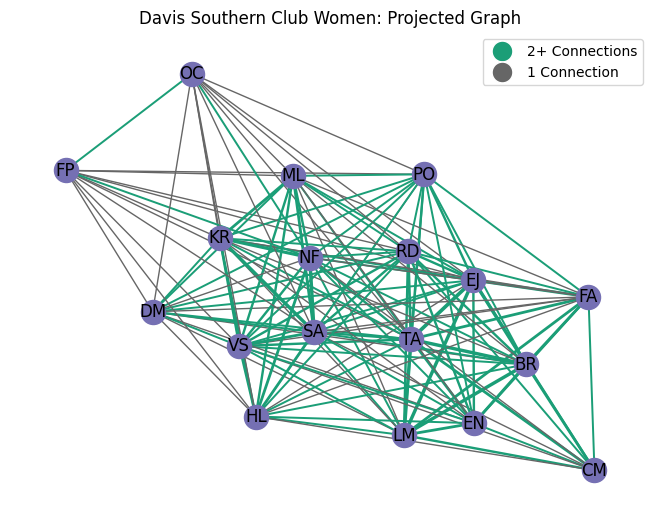

In [ ]:
e_wts = list(nx.get_edge_attributes(W, "weight").values())
e_wts =  [math.sqrt(x) for x in e_wts]
e_cols = ["#1B9E77" if x > 1 else "#666666" for x in e_wts]
pos = nx.spring_layout(W, seed=648)  # Seed layout for reproducible node positions
nx.draw(W, pos, labels=init_dict, node_color="#7570B3", width=e_wts, edge_color=e_cols, with_labels=True)
legend_elements = [Line2D([0], [0], marker='o', color='w', label="2+ Connections",
                          markerfacecolor="#1B9E77", markersize=15),
                   Line2D([0], [0], marker='o', color='w', label="1 Connection",
                          markerfacecolor="#666666", markersize=15)]
plt.legend(handles=legend_elements, loc='upper right')
plt.title("Davis Southern Club Women: Projected Graph")
plt.show()

In [ ]:
# Network density
density = nx.density(W)
print(f"\nNetwork Density: {density:.2f}")


Network Density: 0.91


We see immediately that Olivia Carleton and Flora Price are on the outskirts of the graph. The only people they connected with more than once were each other and Nora Fayette. Based on Nora being their strongest connection to the rest of the group, and the lack of repeated connections with other women, perhaps Olivia and Flora were out-of-town friends visiting Nora for only a short period of time, during which a couple of the events occurred.

With a very high network density (0.91), the rest of the network is very interconnected with some strong ties among certain groups. The women's clustering coefficients can give us an idea of whether their neighboring nodes likely form a clique.

In [ ]:
clustering = nx.clustering(W, weight='weight')
print("\nWomen Clustering Coefficients:\n")
for w, coeff in sorted(clustering.items(), key=lambda x: x[1], reverse=True):
    print(f"{w}: {coeff:.2f}")


Women Clustering Coefficients:

Brenda Rogers: 0.36
Laura Mandeville: 0.36
Theresa Anderson: 0.35
Charlotte McDowd: 0.33
Eleanor Nye: 0.32
Evelyn Jefferson: 0.32
Sylvia Avondale: 0.31
Nora Fayette: 0.29
Ruth DeSand: 0.29
Frances Anderson: 0.29
Katherina Rogers: 0.28
Verne Sanderson: 0.28
Myra Liddel: 0.27
Pearl Oglethorpe: 0.27
Helen Lloyd: 0.25
Dorothy Murchison: 0.23
Flora Price: 0.20
Olivia Carleton: 0.20


Brenda Rogers and Laura Mandeville are the women whose neighbor nodes most likely form a clique based on their clustering coefficients. We can further search for cliques by first eliminating edges representing less than fifty percent of the max number of repeated connections found in this network (seven), then looking at what's left.

In [ ]:
def trim_edges(g_orig, thresh = 1):
    names = nx.get_node_attributes(g_orig, "name")
    g_trim = nx.Graph()
    for src, to, edata in g_orig.edges(data=True):
        if edata["weight"] > thresh:
            g_trim.add_edge(src, to, weight = edata["weight"])
    nx.set_node_attributes(g_trim, names, name="name")
    return g_trim
thresh = 0.5 * max(list(nx.get_edge_attributes(W, "weight").values()))
W2 = trim_edges(W, thresh = thresh)
cliques = sorted(nx.find_cliques(W2), key=len, reverse=True)
print("\nPotential Cliques:\n")
for cliq in cliques:
    print(cliq)


Potential Cliques:

['Theresa Anderson', 'Brenda Rogers', 'Laura Mandeville', 'Frances Anderson', 'Evelyn Jefferson']
['Theresa Anderson', 'Brenda Rogers', 'Laura Mandeville', 'Eleanor Nye']
['Helen Lloyd', 'Nora Fayette', 'Sylvia Avondale']
['Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd']
['Sylvia Avondale', 'Katherina Rogers', 'Nora Fayette']
['Sylvia Avondale', 'Katherina Rogers', 'Myra Liddel']
['Verne Sanderson', 'Sylvia Avondale']
['Theresa Anderson', 'Ruth DeSand']


If we knew more about the women, we might be able to explain and verify these potential cliques using known family, marriage, education, or other ties. Since we do not, we will settle for having identified them.

Next, we project the bipartite graph onto the social event nodes in order to see whether any of the events were particularly significiant. The edges are weighted by the number of shared attendees between the events.

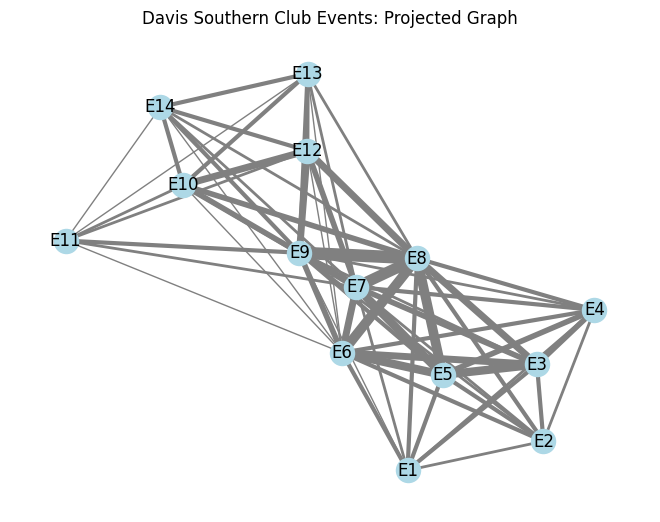

In [ ]:
# Project the bipartite graph onto social events
events = G.graph["bottom"]
E = bipartite.weighted_projected_graph(G, events)
# Visualizing the projected graph of events
pos = nx.spring_layout(E, seed=648)  # Seed for reproducible layout
weights = [E[u][v]['weight'] for u,v in E.edges()]
nx.draw(E, pos, with_labels=True, width=weights, edge_color="grey", node_color="lightblue")
plt.title("Davis Southern Club Events: Projected Graph")
plt.show()

In [ ]:
# Network density
density = nx.density(E)
print(f"\nNetwork Density: {density:.2f}")


Network Density: 0.73


The high network density indicates the events are fairly interconnected, meaning most of the events share at least some attendees, and we can see from the graph that some events share more attendees than others. We look for the most popular events first, i.e. those that have the highest numbers of unique attendees.

In [ ]:
# Analyze the degree of each event node
print("\nEvent Popularity (Number of Unique Attendees):\n")
for event, degree in sorted(E.degree(), key=lambda x: x[1], reverse=True):
    print(f"{event}: {degree}")


Event Popularity (Number of Unique Attendees):

E6: 13
E7: 13
E8: 13
E9: 13
E1: 8
E2: 8
E3: 8
E4: 8
E5: 8
E10: 8
E11: 8
E12: 8
E13: 8
E14: 8


Social events 6 through 9 are the most popular, all tied with a unique attendee count of 13.  Next, we examine the weighted edges of the graph to determine the number of shared attendees between pairs of events. Below are the most interconnected events, i.e. those with a shared attendee count of five or more women.

In [ ]:
# Analyze the weighted edges to see the shared attendees count
print("\nShared Attendees Between Events:\n")
for (u, v, weight) in sorted(E.edges(data=True), key=lambda x: x[2]['weight'], reverse=True):
    if weight['weight'] >= 5:
        print(f"{u} - {v}: {weight['weight']} shared attendees")


Shared Attendees Between Events:

E8 - E9: 9 shared attendees
E7 - E8: 8 shared attendees
E5 - E8: 7 shared attendees
E6 - E8: 7 shared attendees
E3 - E5: 6 shared attendees
E5 - E6: 6 shared attendees
E5 - E7: 6 shared attendees
E3 - E6: 5 shared attendees
E3 - E8: 5 shared attendees
E6 - E7: 5 shared attendees
E7 - E9: 5 shared attendees
E8 - E12: 5 shared attendees
E9 - E12: 5 shared attendees
E10 - E12: 5 shared attendees


Events 8 and 9 have the highest number of shared attendees (9), indicating a strong connection between these two events. The events could have had similar themes, been tailored to similar interests, or been hosted at the same venue and/or by the same person. Next we look at the clustering coefficients for these events.

In [ ]:
# Clustering coefficient for the events network
clustering = nx.clustering(E, weight='weight')
print("\nEvent Clustering Coefficients:\n")
for event, coeff in sorted(clustering.items(), key=lambda x: x[1], reverse=True):
    print(f"{event}: {coeff:.2f}")


Event Clustering Coefficients:

E5: 0.46
E3: 0.42
E4: 0.35
E12: 0.35
E10: 0.33
E2: 0.32
E1: 0.31
E8: 0.29
E13: 0.27
E14: 0.27
E7: 0.26
E9: 0.25
E6: 0.23
E11: 0.22


Events 3 and 5 have the highest clustering coefficients, suggesting their neighbor nodes form cliques of events attended by the same people. We look for potential event cliques below:

In [ ]:
thresh = 0.5 * max(list(nx.get_edge_attributes(E, "weight").values()))
E2 = trim_edges(E, thresh = thresh)
cliques = sorted(nx.find_cliques(E2), key=len, reverse=True)
print("\nPotential Cliques:\n")
for cliq in cliques:
    print(cliq)


Potential Cliques:

['E8', 'E6', 'E5', 'E3']
['E8', 'E6', 'E5', 'E7']
['E8', 'E9', 'E12']
['E8', 'E9', 'E7']
['E10', 'E12']


While a clique of people is easy to understand, a clique of events is less intuitive. However, one interpretation of a clique of events could be season. For example, the end of the calendar year is a significant season for fundraising events, so end-of-year fundraising events might theoretically form a clique. Some clubs also host events that are mandatory for membership, so mandatory events might theoretically form another clique. With more information about the events, we could truly explain and verify the potential event cliques, but guesswork will have to do for now.